In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [13]:
import os
# Print the current working directory
print(os.getcwd())


C:\Users\trive


In [17]:
os.chdir('C:/Users/trive/PythonProject')

In [19]:
print(os.getcwd())

C:\Users\trive\PythonProject


In [21]:
# Load The dataset
df = pd.read_csv('AEP_hourly.csv', parse_dates=['Datetime'], index_col='Datetime')

# Display basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB
None
                      AEP_MW
Datetime                    
2004-12-31 01:00:00  13478.0
2004-12-31 02:00:00  12865.0
2004-12-31 03:00:00  12577.0
2004-12-31 04:00:00  12517.0
2004-12-31 05:00:00  12670.0


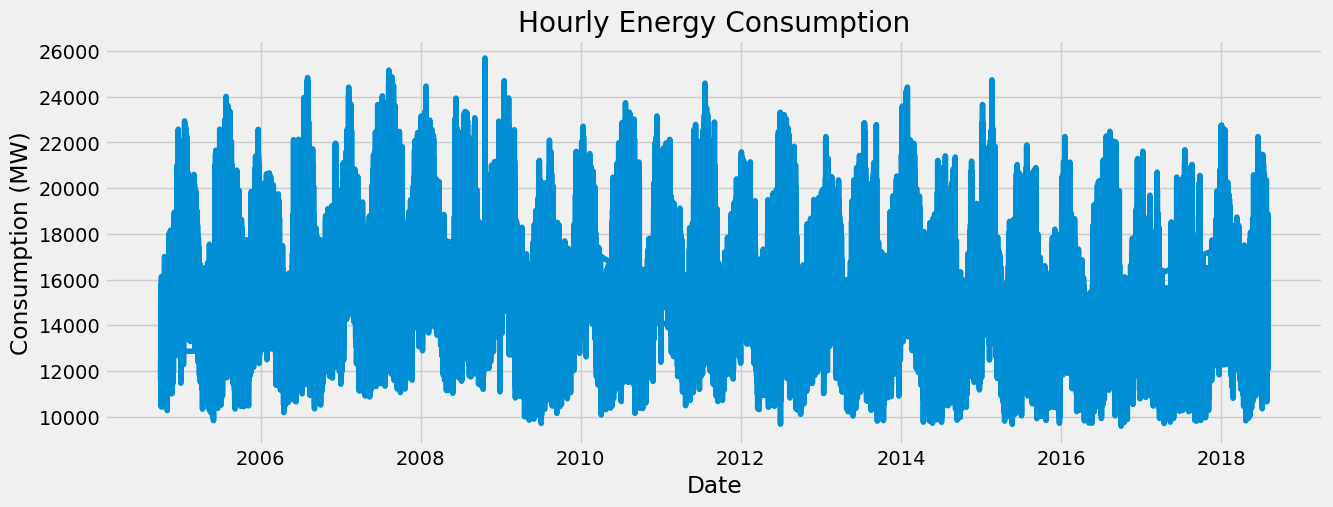

In [23]:
# Time series plot
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['AEP_MW'])
plt.title('Hourly Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption (MW)')
plt.show()

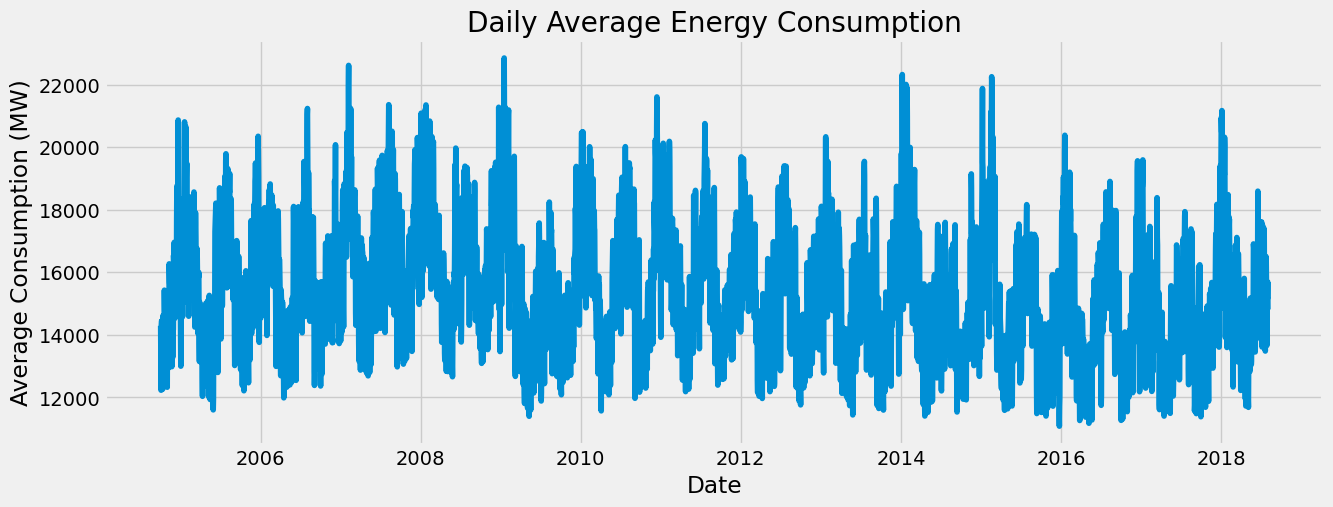

In [25]:
# Resampling to daily data and plotting
daily_consumption = df['AEP_MW'].resample('D').mean()
plt.figure(figsize=(14, 5))
plt.plot(daily_consumption.index, daily_consumption)
plt.title('Daily Average Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Average Consumption (MW)')
plt.show()

In [27]:
df['Hour'] = df.index.hour
df['DayOfWeek'] = df.index.dayofweek
df['Month'] = df.index.month

In [29]:
# Average consumption by hour
hourly_avg = df.groupby('Hour')['AEP_MW'].mean()
print(hourly_avg)

# Average consumption by day of the week
dow_avg = df.groupby('DayOfWeek')['AEP_MW'].mean()
print(dow_avg)

# Average consumption by month
monthly_avg = df.groupby('Month')['AEP_MW'].mean()
print(monthly_avg)

Hour
0     14651.191569
1     13891.478433
2     13432.062995
3     13184.049008
4     13095.193350
5     13240.535813
6     13802.401464
7     14781.668381
8     15478.830233
9     15822.653740
10    16084.283934
11    16306.315592
12    16398.177087
13    16477.793035
14    16534.660202
15    16492.810645
16    16444.506134
17    16542.038781
18    16762.940047
19    16868.728334
20    16821.335180
21    16763.806292
22    16468.967550
23    15632.594183
Name: AEP_MW, dtype: float64
DayOfWeek
0    15810.973684
1    16057.615571
2    16013.589739
3    16028.138281
4    15773.123911
5    14610.979628
6    14200.754680
Name: AEP_MW, dtype: float64
Month
1     17431.269009
2     17022.815084
3     15376.835720
4     13823.857511
5     14006.393817
6     15630.021825
7     16349.853303
8     16424.881699
9     14657.280556
10    13938.926431
11    14930.405676
12    16445.609084
Name: AEP_MW, dtype: float64


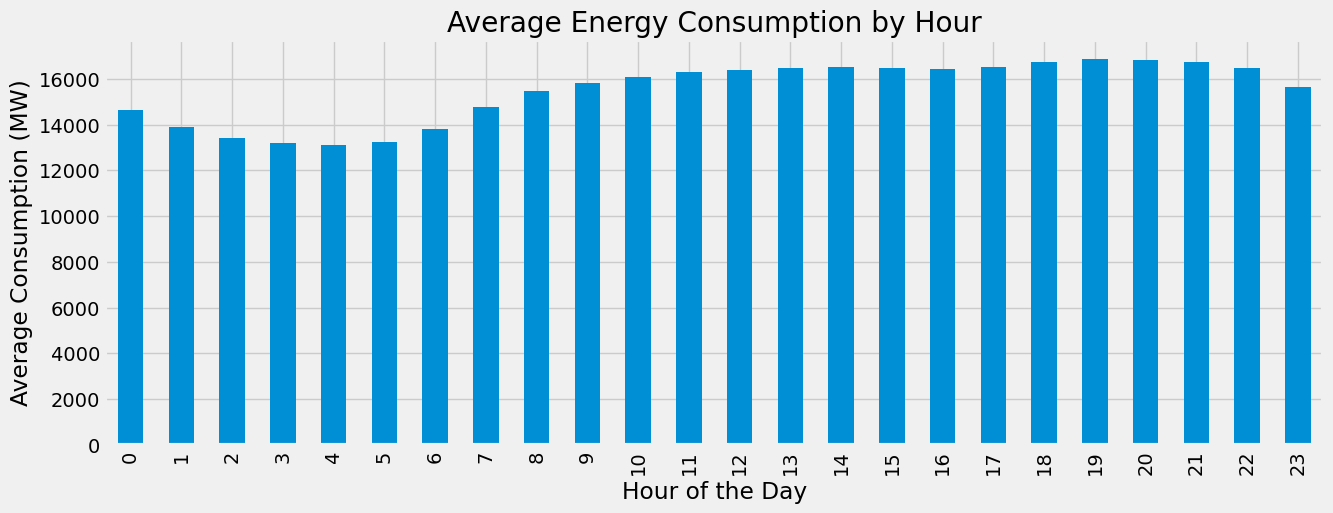

In [31]:
# Plot average consumption by hour
plt.figure(figsize=(14, 5))
hourly_avg.plot(kind='bar')
plt.title('Average Energy Consumption by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Consumption (MW)')
plt.show()


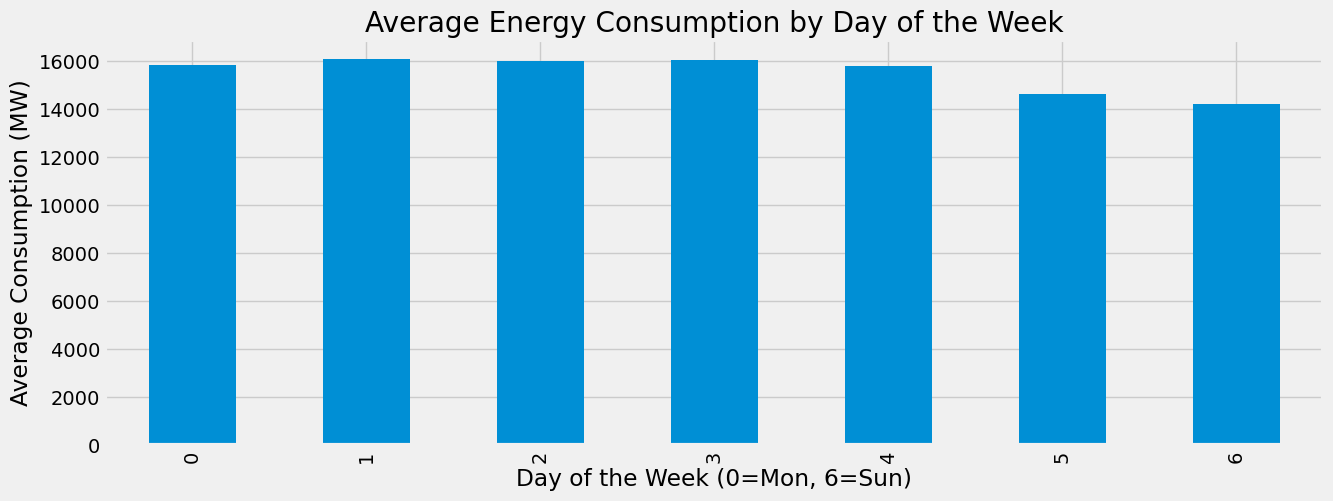

In [33]:
# Plot average consumption by day of week
plt.figure(figsize=(14, 5))
dow_avg.plot(kind='bar')
plt.title('Average Energy Consumption by Day of the Week')
plt.xlabel('Day of the Week (0=Mon, 6=Sun)')
plt.ylabel('Average Consumption (MW)')
plt.show()

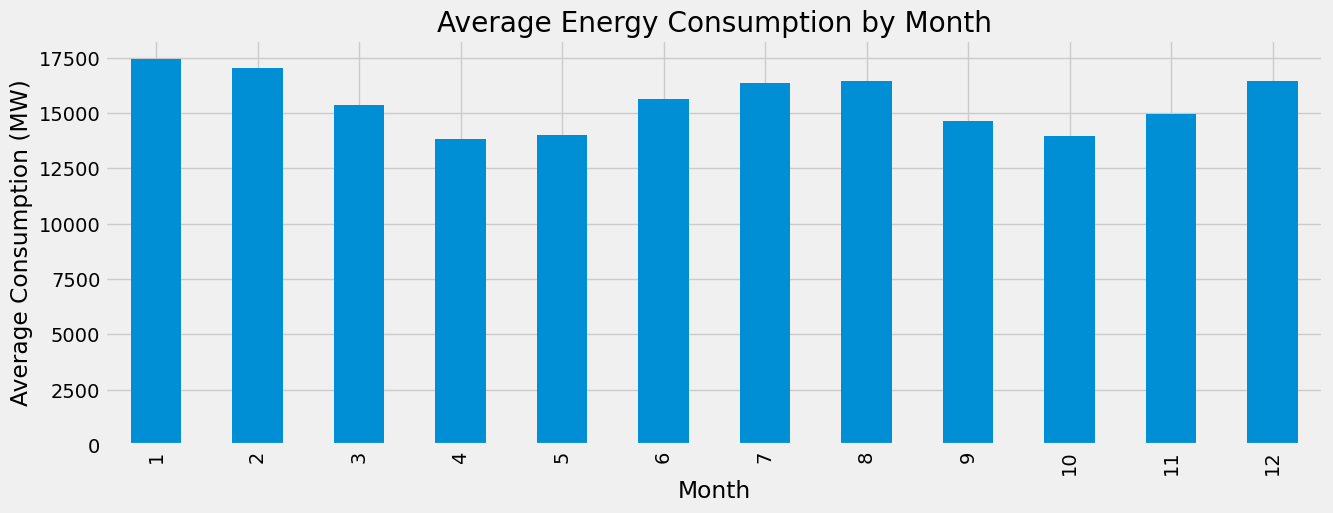

In [35]:
# Plot average consumption by month
plt.figure(figsize=(14, 5))
monthly_avg.plot(kind='bar')
plt.title('Average Energy Consumption by Month')
plt.xlabel('Month')
plt.ylabel('Average Consumption (MW)')
plt.show()

In [39]:
# Resample hourly data to get daily average consumption
df_daily = df['AEP_MW'].resample('D').mean()

# Verify by checking the first few rows
print(df_daily.head())

Datetime
2004-10-01    14284.521739
2004-10-02    12999.875000
2004-10-03    12227.083333
2004-10-04    14309.041667
2004-10-05    14439.708333
Freq: D, Name: AEP_MW, dtype: float64


In [41]:
# Define train-test split (80% training, 20% testing)
train_size = int(len(df_daily) * 0.8)
train = df_daily.iloc[:train_size]
test = df_daily.iloc[train_size:]

# Print the date range for each set to verify the split
print("Training set period:", train.index.min(), "to", train.index.max())
print("Testing set period:", test.index.min(), "to", test.index.max())

Training set period: 2004-10-01 00:00:00 to 2015-10-27 00:00:00
Testing set period: 2015-10-28 00:00:00 to 2018-08-03 00:00:00


In [43]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [45]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ------------- -------------------------- 4.5/13.3 MB 44.6 MB/s eta 0:00:01
   ---------------------------------------- 13.3/13.3 MB 38.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/863.9 kB ? eta -:--:--
   --------------------------------------- 863.9/863.9 kB 37.6 MB/s eta 0:00:00


In [47]:
from prophet import Prophet

In [49]:
# Prepare the training data in Prophet format
train_prophet = train.reset_index().rename(columns={'Datetime': 'ds', 'AEP_MW': 'y'})
# Note: Since our index name is 'Datetime', ensure it matches after reset_index
# If the index name is lost, you may need to rename the date column accordingly.
print(train_prophet.head())

          ds             y
0 2004-10-01  14284.521739
1 2004-10-02  12999.875000
2 2004-10-03  12227.083333
3 2004-10-04  14309.041667
4 2004-10-05  14439.708333


In [53]:
# Initialize the Prophet model with default settings
model = Prophet()

# Fit the model to the data
model.fit(train_prophet)

15:09:09 - cmdstanpy - INFO - Chain [1] start processing
15:09:10 - cmdstanpy - INFO - Chain [1] done processing


In [55]:
# Create a DataFrame to hold predictions for the next year (365 days * 24 hours)
future = model.make_future_dataframe(periods=365 * 24, freq='H')

# Check the tail of the future DataFrame to see the forecast period
print(future.tail())

                       ds
12799 2016-10-25 20:00:00
12800 2016-10-25 21:00:00
12801 2016-10-25 22:00:00
12802 2016-10-25 23:00:00
12803 2016-10-26 00:00:00


C:\Users\trive\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [57]:
# Generate the forecast
forecast = model.predict(future)

# Display the forecasted data
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

                       ds          yhat    yhat_lower    yhat_upper
12799 2016-10-25 20:00:00  14143.205660  12526.988859  15676.537960
12800 2016-10-25 21:00:00  14152.122462  12661.793533  15605.931379
12801 2016-10-25 22:00:00  14161.453565  12716.378811  15593.300381
12802 2016-10-25 23:00:00  14171.063388  12642.458267  15726.400130
12803 2016-10-26 00:00:00  14180.816542  12696.320676  15738.116404


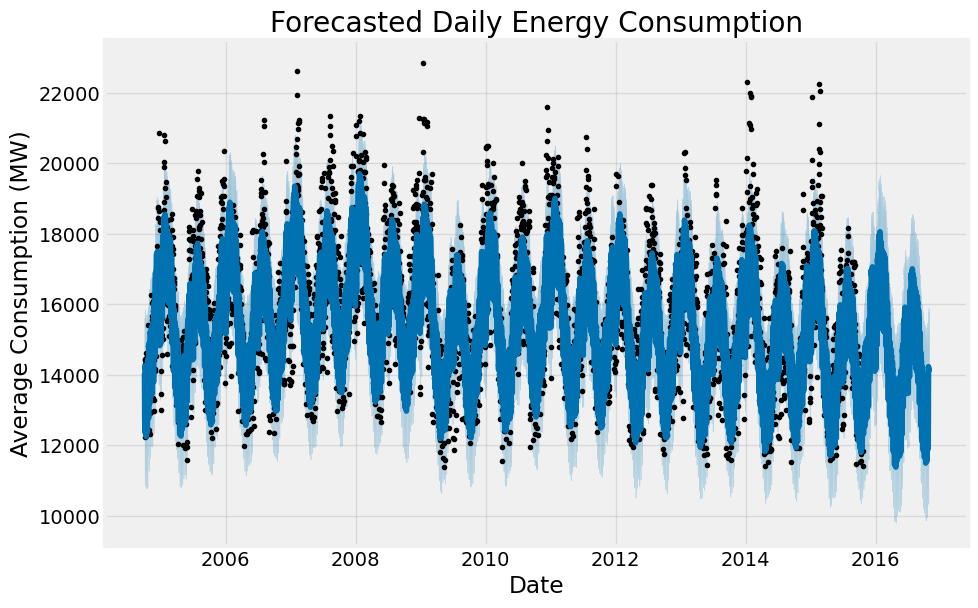

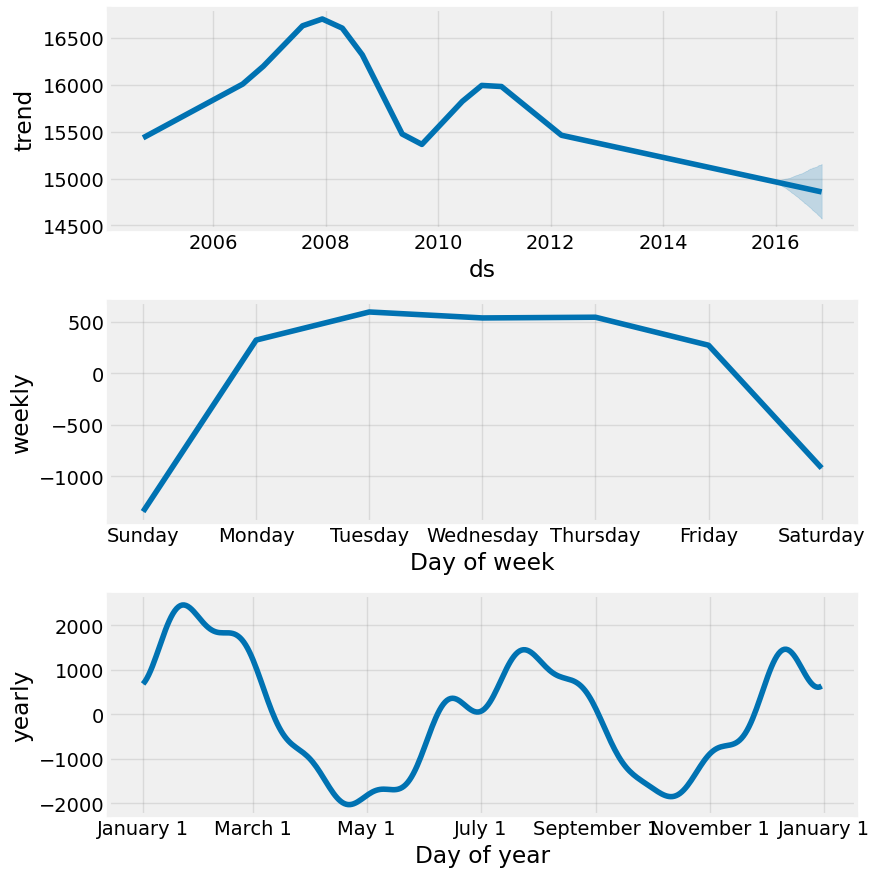

In [59]:
# Plot the forecasted results along with historical data
fig1 = model.plot(forecast)
plt.title('Forecasted Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Average Consumption (MW)')
plt.show()

# Plot forecast components (trend, weekly, yearly seasonality)
fig2 = model.plot_components(forecast)
plt.show()

In [63]:
from sklearn.metrics import mean_absolute_error

In [67]:
# Prepare the forecast DataFrame by setting the index to 'ds'
forecast_df = forecast[['ds', 'yhat']].set_index('ds')

# Align the forecast with the actual test data
actual = test.to_frame()  # convert test Series to DataFrame
df_eval = actual.join(forecast_df, how='inner')

# Calculate error metrics: RMSE and MAE
rmse = np.sqrt(mean_squared_error(df_eval['AEP_MW'], df_eval['yhat']))
mae = mean_absolute_error(df_eval['AEP_MW'], df_eval['yhat'])
mape = np.mean(np.abs((df_eval['AEP_MW'] - df_eval['yhat']) / df_eval['AEP_MW'])) * 100

print("Forecast Performance:")
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE: {:.2f}%".format(mape))

Forecast Performance:
RMSE: 1356.7842167980757
MAE: 1057.3765239294737
MAPE: 7.33%


In [71]:
# Filter data for training: Use data up to December 31, 2019.
train_df = df_daily.loc[:'2019-12-31']
print("Training data period:", train_df.index.min(), "to", train_df.index.max())

Training data period: 2004-10-01 00:00:00 to 2018-08-03 00:00:00


In [73]:
# Prepare the data for Prophet
# 'ds' for dates and 'y' for the target variable.
train_prophet = train_df.reset_index().rename(columns={'Datetime': 'ds', 'AEP_MW': 'y'})
# If your reset_index gives a different column name (like 'index'), rename it accordingly.
if 'Datetime' not in train_prophet.columns:
    train_prophet.rename(columns={'index': 'ds'}, inplace=True)

In [75]:
print("Data prepared for Prophet:")
print(train_prophet.head())


Data prepared for Prophet:
          ds             y
0 2004-10-01  14284.521739
1 2004-10-02  12999.875000
2 2004-10-03  12227.083333
3 2004-10-04  14309.041667
4 2004-10-05  14439.708333


In [77]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(train_prophet)

15:49:34 - cmdstanpy - INFO - Chain [1] start processing
15:49:34 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
# Create a future dataframe for forecasting
# Forecast for 365 days (1 year) after the last training date.
future = model.make_future_dataframe(periods=365)
print("Future dataframe created with shape:", future.shape)

Future dataframe created with shape: (5420, 1)


In [81]:
# Generate the forecast
forecast = model.predict(future)
print("Forecast head:")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

Forecast head:
             ds          yhat    yhat_lower    yhat_upper
5415 2019-07-30  16895.874920  15373.095157  18381.732308
5416 2019-07-31  16821.957783  15217.403837  18331.357505
5417 2019-08-01  16804.545957  15279.455168  18473.291192
5418 2019-08-02  16517.351048  14941.943444  17996.831817
5419 2019-08-03  15323.872512  13824.697991  16979.994938


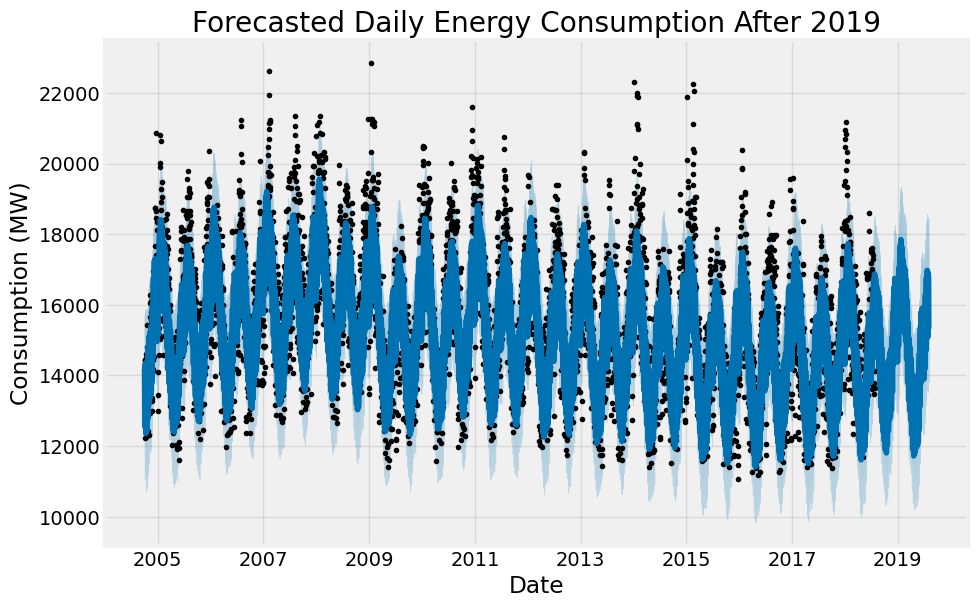

In [83]:
# Visualize the forecast
fig1 = model.plot(forecast)
plt.title('Forecasted Daily Energy Consumption After 2019')
plt.xlabel('Date')
plt.ylabel('Consumption (MW)')
plt.show()

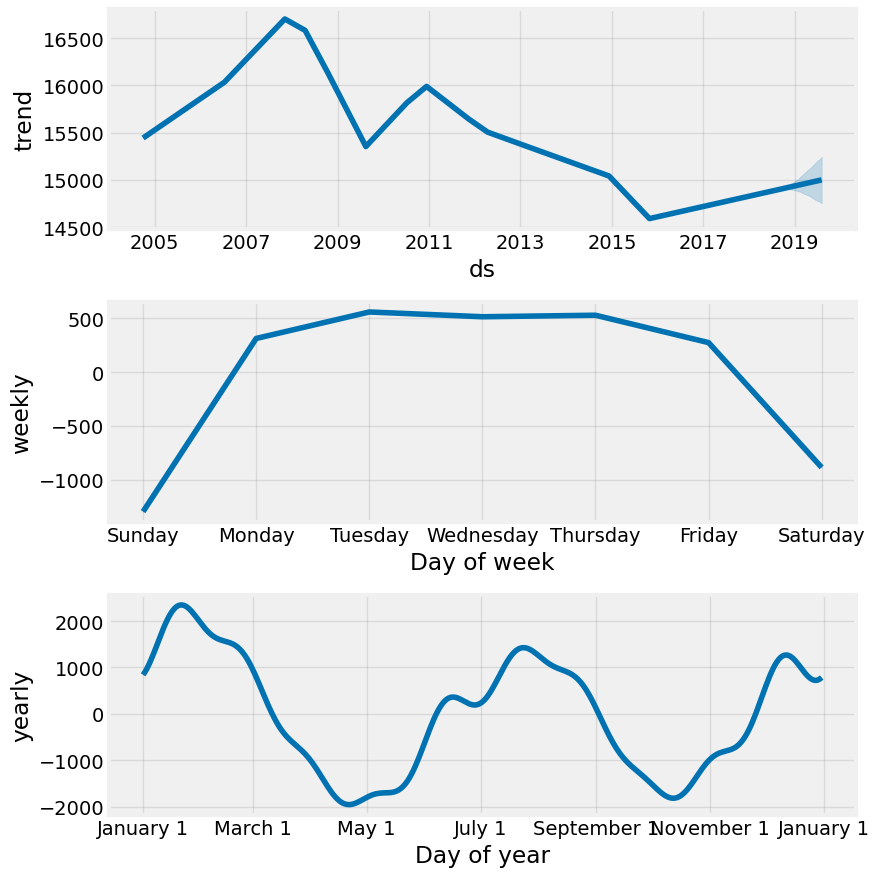

In [85]:
fig2 = model.plot_components(forecast)
plt.show()